

# Project 2 - Data Analysis: Investigate TMDb movie Data
## Rafael Jung 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this second project, i will use the TMDb movie dataset. The description of this dataset is "This data set contains information about 10,000 movies collected from the movie Database(TMDb)". Some Informations about this data is budget, revenue, the movie title, cast, director,runtime and others. 

The dependent variable i will choose to explore is "Revenue_adj". I want to know more about some characteristics that influences on the revenue. But, there's a huge difference on 50's dollar value and 90's, for example. It's fair compare them with the same metric.


The three Independent Variables, and the three questions i will answer are: 1- Budget_adj- Does more budget represents more revenue? 2- runtime- Does the duration of the movie influences the people go and pay fot a ticket? Does long movie duration discourages people to watch? 3- Directors- Which director has the higher average Revenue? 



.

On this section, i'll import the necessary packages on the analysis, and perform some operations to inspect data structure, like number of rows and columns, the column type, and missing values.

### General Properties

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Import the dataset and check its first lines.

df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [2]:
#Check the number of rows and Columns
df.shape

(10866, 21)

In [3]:
#Check the summary statistics of the quantitative features
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
# Explore data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#The "keyword" feature didn't appear on .head(). Let's explore apart
df['keywords'].value_counts()

woman director                                                                            134
independent film                                                                           82
sport                                                                                      25
musical                                                                                    24
duringcreditsstinger                                                                       24
suspense                                                                                   24
stand-up|stand up comedy                                                                   16
holiday                                                                                    16
biography                                                                                  15
independent film|woman director                                                            13
stand up comedy                                             

In [6]:
#Exploring the Null Values for further drop on the data cleaning. 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

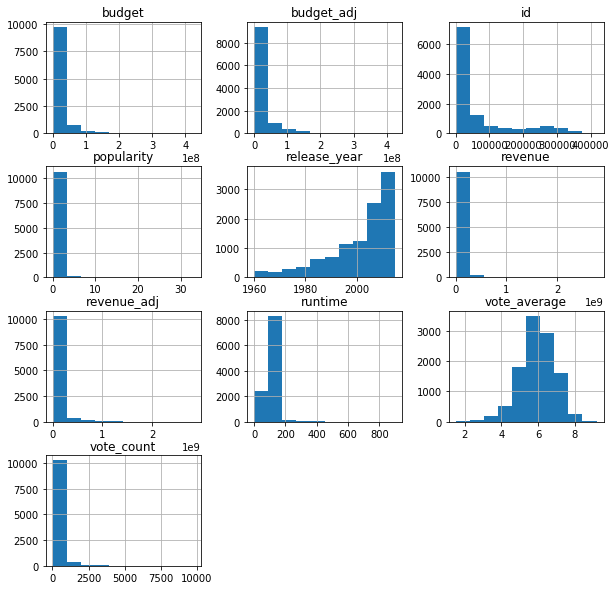

In [7]:
#Plot Histograms to analyze some destributions and low/high varibility
df.hist(figsize=(10,10));

In [8]:
#Check how many "0" revenue values the dataset have
(df['revenue_adj'] == 0).sum()

6016

In [9]:
#Check how many "0" budget the dataset have
(df['budget_adj'] == 0).sum()

5696

In [10]:
df.duplicated().sum()

1

### knowledge got on General Properties

This Dataset has 10866 rows and 21 Columns. On .describe() method i've discovered some features i will use on analysis have zero values. Using .info shows dataset has a lot of missing values, then later, i show them o "df.isnull.sum()" code. I Will drop them on data Cleaning. 

Plotting histograms about data, we can clearly see a lot of features skewed to right. Some of them, like budget_adj and Runtine i will use on analysis, and they will have a deeper outliers analysis on the next step. 


The independent variable "Revenue_adj" and "budget_adj" has "0" values, and to check them i used (df['revenue_adj'] == 0).sum() and (df['budget_adj'] == 0).sum(). We discovered that more than 50% of data has "0" values on revenue and budget features. We will revove them.

This dataset has only one duplicated row, this won't have a great impact on analysis. 





## Data Cleaning 

The next steps i will remove the columns i won't use to analysis, and i will remove outliers from dependent and independent variable.

The features i will drop are mostly due to variability. 

The outliers remove method i will use is by IQR. The methoed i've learned on UDacity Data Analysis Portuguese Version.

### Columns to Drop
**id** = much variability(i've learned on portuguese data analyst version,much variability is a great indicative to drop)
**imdb_id** = The same issue. this feature is just to identify on IMDb
**cast** - On my analysis i won't use cast to search on revenue. P.S: Maybe this can be use on a further investigation.
**homepage**- Every film has its own page. 
**keywords** - Too much variability
**tagline** - Too much information
**overview** - Too much information 
**production_companies** - Missing Values that you can't fill, i will drop the entire feature.



In [11]:
#Drop Columns
df.drop(['id', 'imdb_id','cast','homepage','tagline','keywords','overview','production_companies'],axis=1 ,inplace=True)

In [12]:
#Check if the drop method has worked

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


### Removing Zero Values 

The next step is remove the zero values from "Revenue_adj" and "budget_adj', the independet and dependent variable of this data analysis. We will save in a new Variable - "df_adj".  



In [13]:
#Removing the zero from "Revenue_adj"
df_adj = df[df['revenue_adj'] != 0]

In [14]:
#checking the Remove 
df_adj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 10848
Data columns (total 13 columns):
popularity        4850 non-null float64
budget            4850 non-null int64
revenue           4850 non-null int64
original_title    4850 non-null object
director          4849 non-null object
runtime           4850 non-null int64
genres            4850 non-null object
release_date      4850 non-null object
vote_count        4850 non-null int64
vote_average      4850 non-null float64
release_year      4850 non-null int64
budget_adj        4850 non-null float64
revenue_adj       4850 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 530.5+ KB


In [15]:
#Removing the zero from "budget_adj"
df_adj = df_adj[df_adj['budget_adj'] != 0]

In [16]:
#Checking the Remove
df_adj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3855 non-null float64
budget            3855 non-null int64
revenue           3855 non-null int64
original_title    3855 non-null object
director          3854 non-null object
runtime           3855 non-null int64
genres            3855 non-null object
release_date      3855 non-null object
vote_count        3855 non-null int64
vote_average      3855 non-null float64
release_year      3855 non-null int64
budget_adj        3855 non-null float64
revenue_adj       3855 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 421.6+ KB


### Outliers 


The next step is remove the outliers from independent and dependent variable. The method used on this analysis is the IQR( i've learned on portuguese data analyst version).

The outliers i will remove from 'revenue_adj" and 'budget_adj" are to facilitate the analysis and the further plots. Since, this two features has too many high values, the scatter plot won't show any insight, any correlation, just some points on right, and a lot of points on left. 



### Outliers - Revenue

The 'revenue_adj" is the Independent Variable, and have high values. We will chek them And remove the outliers. 

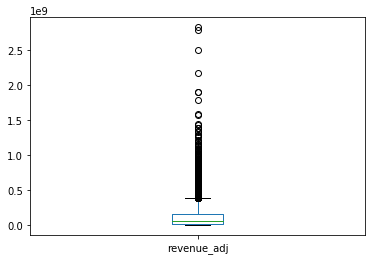

In [17]:
#Before the cleaning let's explore the Outliers From Independent Variable
df_adj['revenue_adj'].plot(kind='box');


Here, we can clearly see a lot of values above the box plot. We will remove them below, using the IQR and Upper Fence

### Upper Fence - Revenue
Since it has a lot of data above the "Upper Fence" of the box plot, i will use this method to drop outliers. (This Method i got on Brazilian version of data analyst).
Upper fence = 3ºquartile + 1.5 * (3°quartile - 1ºquartile)

In [18]:
#First we create the first and third quartile variables
rev_3 = df_adj['revenue_adj'].quantile(.75)  
rev_1 = df_adj['revenue_adj'].quantile(.25)  
rev_3,rev_1

(163240089.709074, 18341233.685438)

In [19]:
#Second, we calculate the IQR- it's the difference between the third and first quartile.
IQR_rev = rev_3 - rev_1
IQR_rev

144898856.02363598

In [20]:
#Third, we calculate the Upper Fence= 3ºquartile + 1.5 * IQR
rev_upper_fence = rev_3 + (1.5* IQR_rev)
rev_upper_fence

380588373.74452794

In [21]:
# Remove the Revenue Upper Fence Outliers
df_adj = df_adj[df_adj['revenue_adj'] < rev_upper_fence]
df_adj.shape

(3501, 13)

Removing Upper Fence outliers from 'revenue_adj" has decreased the observations from 3855 to 3501. 

### Lower Fence - Revenue
Now i will check the lower fence by revenue_adj, i will use this method to drop outliers. (This Method i got on Brazilian version of data analyst).
Lower fence = 1 ºquartile - 1.5 * (3°quartile - 1ºquartile)

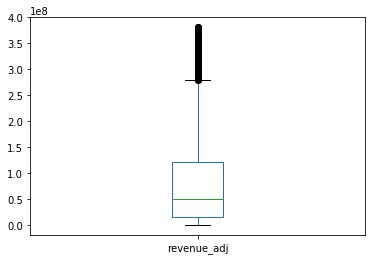

In [22]:
#Checking the box plot after removing the Upper fence
df_adj['revenue_adj'].plot(kind='box');

The plot looks don't have any lower fence, but i will check by the formula.

In [23]:
# The Revenue Lower Fence Value
rev_lower_fence = rev_1 - (1.5* IQR_rev)
rev_lower_fence

-199007050.35001597

In [24]:
#Checking if Revenue has any value under the lower Fence
df_adj[df_adj['revenue_adj'] < rev_lower_fence].shape

(0, 13)

And the hyphotesis is right: the 'revenue_adj' don't have any lower fence outlier.

### Outliers - Budget

The feature "budget_adj" is quantitative dependent variable. The same as 'revenue_adj', this feature has a lot of high values and to make a easier inference about the plots, i will remove them. 

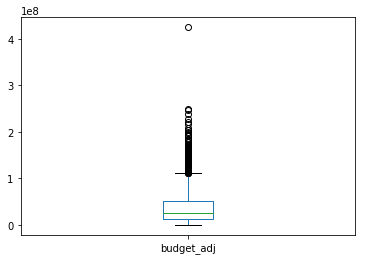

In [25]:
#Checking the Outliers using a Box Plot.
df_adj['budget_adj'].plot(kind='box');


Like the 'revenue_adj', 'budget_adj' has a lot of values above the upper fence

### Upper Fence - Budget
The same case as Revenue, the budget box plot has a lot of data above the "Upper Fence", i will use this method to drop outliers. (This Method i got on Brazilian version of data analyst).
Upper fence = 3ºquartile + 1.5 * (3°quartile - 1ºquartile)

In [26]:
#First we create the first and third quartile variables
bud_3 = df_adj['budget_adj'].quantile(.75)  
bud_1 = df_adj['budget_adj'].quantile(.25)  
bud_3,bud_1

(51950042.9915466, 12122613.9362054)

In [27]:
#Second, we calculate the IQR- it's the difference between the third and first quartile.
IQR_bud = bud_3 - bud_1
IQR_bud

39827429.0553412

In [28]:
#Third, we calculate the Upper Fence= 3ºquartile + 1.5 * IQR
bud_upper_fence = bud_3 + (1.5* IQR_bud)
bud_upper_fence

111691186.5745584

In [29]:
#Removing the values above the Upper Fence
df_adj = df_adj[df_adj['budget_adj'] < bud_upper_fence]
df_adj.shape

(3339, 13)

### Lower Fence - Budget
As i did before on 'revenue_adj' i will check the lower fence of 'budget_adj' too, i will use this method to drop outliers. (This Method i got on Brazilian version of data analyst).
Lower fence = 3ºquartile - 1.5 * (3°quartile - 1ºquartile)

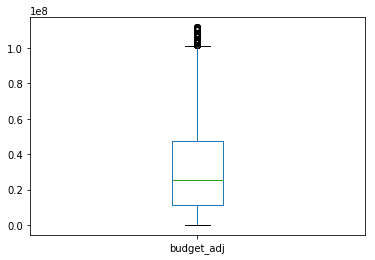

In [30]:
#Checking with box plot 
df_adj['budget_adj'].plot(kind='box');

budget_adj doesn't looks like have lower fence outlier values, but let's check by the formula.

In [31]:
#Lower Fence 
bud_lower_fence = bud_1 - (1.5* IQR_bud)
bud_lower_fence

-47618529.6468064

In [32]:
#Checking if budget_adj has any value under the lower Fence 
df_adj[df_adj['budget_adj'] < bud_lower_fence].shape


(0, 13)

### Outliers - Runtime 

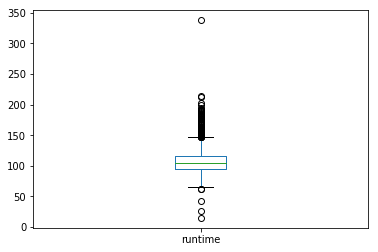

In [33]:
#Checking Box Plot of Runtime
df_adj['runtime'].plot(kind='box');


We Can clearly see, the runtime feature has both values above the upper fence and under the Lower fence.

### Upper Fence - Runtime
The same case as Revenue, the budget box plot has a lot of data above the "Upper Fence", i will use this method to drop outliers. (This Method i got on Brazilian version of data analyst).
Upper fence = 3ºquartile + 1.5 * (3°quartile - 1ºquartile)

In [34]:
#First we create the first and third quartile variables
run_3 = df_adj['runtime'].quantile(.75)  
run_1 = df_adj['runtime'].quantile(.25)  
run_3,run_1

(116.0, 95.0)

In [35]:
#Second, we calculate the IQR- it's the difference between the third and first quartile.
IQR_run = run_3 - run_1
IQR_run

21.0

In [36]:
#Third, we calculate the Upper Fence= 3ºquartile + 1.5 * IQR
run_upper_fence = run_3 + (1.5* IQR_run)
run_upper_fence

147.5

In [37]:
#Remove upper fence values
df_adj = df_adj[df_adj['runtime'] < run_upper_fence]
df_adj.shape

(3246, 13)

### Lower Fence - Budget
Since it has a lot of data above the "Upper Fence" of the box plot, i will use this method to drop outliers. (This Method i got on Brazilian version of data analyst).
Lower fence = 3ºquartile - 1.5 * (3°quartile - 1ºquartile)

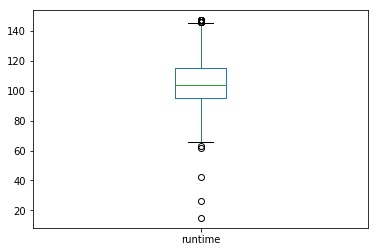

In [38]:
#Checking with box plot 
df_adj['runtime'].plot(kind='box');

Different of the other Two features we have analysed, 'runtime' looks like has some lower fence outliers.

In [39]:
#lower Fence
run_lower_fence = run_3 - (1.5* IQR_run)
run_lower_fence

84.5

In [40]:
#Checking how many lower fence outliers 'runtime' have.
df_adj[df_adj['runtime'] < run_lower_fence].shape


(142, 13)

In [41]:
#Removing the 142 lowr fence outliers.
df_adj = df_adj[df_adj['runtime'] > run_lower_fence]
df_adj.shape

(3104, 13)

<a id='eda'></a>
## Exploratory Data Analysis

On These next lines, i will answer the three questions of this analysis: 1- Budget_adj- Does more budget represents more revenue? 2- runtime- Does the duration of the movie influences the people go and pay fot a ticket? Does long movie duration discourages people to watch? 3- Directors- Which director has the higher average Revenue? 

### Does higher budget can make a movie get more revenue? 

For Answer this Question, i have removed the outliers from 'revenue_adj' and from 'budget_adj', since they complicated the analysis and see the correlation between these two features.

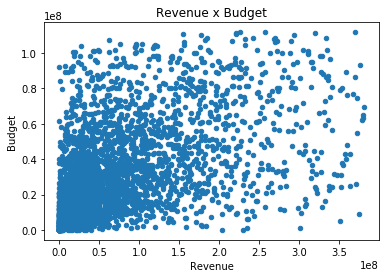

In [42]:
#Scatter plot to show the relationship between two numerics variables: Revenue_adj and Budget_adj.
df_adj.plot(x='revenue_adj',y='budget_adj',kind='scatter')
plt.title("Revenue x Budget")
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.show;

 ### Does the duration of the movie influences the people go and pay fot a ticket? Does long movie duration discourages people to watch?
 
 Similar as the first question, i have removed the 'runtime' outliers too, to facilitate the analysis of the data. 

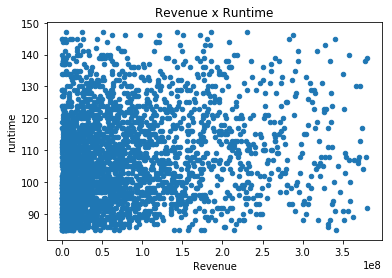

In [43]:
df_adj.plot(x='revenue_adj',y='runtime',kind='scatter')
plt.title("Revenue x Runtime")
plt.xlabel('Revenue')
plt.ylabel('runtime')
plt.show;


### Which director has the higher average Revenue?

Different of the other two questions, these is a analysis between a quantitative and qualitative feature, then for answer the question the choice of plot is a horizontal bar chart.

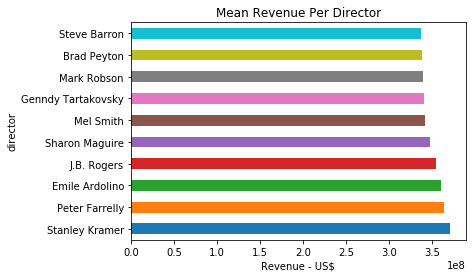

In [44]:
df_adj.groupby('director')['revenue_adj'].mean().nlargest(n=10).plot(kind='barh',x='revenue_adj',y='director')
plt.xlabel('Revenue - US$')
plt.title( 'Mean Revenue Per Director');



<a id='conclusions'></a>
## Conclusions

Our Conclusions about the three questions are: 1 - Revenue and Budget looks like have a positive correlation. Even it's a weak releationship between the two features, is clearly. 2- Runtime and Revenue have a positive correlation too, like the first question, it's hard to answer how much of correlation they have, and it looks like weak but it's there. 3- The top 10 Directors with more Mean Revenue are on descending order: 1- Stanley Kramer,2- Peter Farrelly, 3- Emilie Andolino, 4- J.B Rogers, 5- Sharon Maguire, 6- Mel Smith, 7- Genndy Tartakovsky, 8- mark Robson, 9- Brad Peyton, 10- Steve Barron. 






# References 

https://www.udacity.com/course/data-analyst-nanodegree--nd002 - Data Analyst 
https://classroom.udacity.com/nanodegrees/nd008-br/dashboard/overview - BR Data Analyst 
https://python-graph-gallery.com/2-horizontal-barplot/ - horizontal bar plot
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html - N-largest method.


